# ADS Midterm 2018

## Practice part
## Case I. Crime statistics

Crime Rate in 47 states of the USA with 13 explanatory variables  
The crime rate (**Y**) in 47 states in the U.S. was reported together with possible factors that might influence it. The factors recorded are as follows;  
X1 = the number of males aged 14 - 24 per 1000 of total state population  
X2 = binary variable distinguishing southern states (X2 =1) from the rest (X2=0).  
X3 = the mean number of years of schooling x 10 of the population, 25 years old and over  
X4 = police expenditure (in dollars) per person by state and local government in 1960  
X5 = police expenditure (in dollars) per person by state and local government in 1959  
X6 = labour force participation rate per 1000 civilian urban males in the age group 14-24  
X7 = the number of males per 1000 females  
X8 = state population size in hundred thousands  
X9 = unemployment rate of urban males per 1000 in the age group 14-24    
X10 = unemployment rate of urban males per 1000 in the age group 35-59.  
X11 = the median value of family income or transferable goods and assets (unit 10 dollars)  
X12 = the number of families per 1000 earning below one-half of the median income.  

In [2]:
# Libraries which might be required
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
from sklearn import linear_model
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_excel('DATA/Crime.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,151,1,91,58,56,510,950,33,108,41,394,261,79.1
1,143,0,113,103,95,583,1012,13,96,36,557,194,163.5
2,142,1,89,45,44,533,969,18,94,33,318,250,57.8
3,136,0,121,149,141,577,994,157,102,39,673,167,196.9
4,141,0,121,109,101,591,985,18,91,20,578,174,123.4


### Q1. Report the correlation coefficients between each feature and the output variable Y (crimes per 100)
Please use a loop

In [3]:
data.corr()['Y']

X1    -0.089472
X2    -0.090637
X3     0.322835
X4     0.687604
X5     0.666714
X6     0.188866
X7     0.213914
X8     0.337474
X9    -0.050478
X10    0.177321
X11    0.441320
X12   -0.179024
Y      1.000000
Name: Y, dtype: float64

The correlations of variables x4, x5 are high with output Y 

### Q2. Look at the impact of each feature separately (on all 47 observations)
    Fit bi-variate regressions and report the estimate as well as the p-values. Please use a loop

In [5]:
# define list of predictors
lis_predictors = list(data.columns)

# remove y
lis_predictors.remove('Y')

# define empty data frame for regression results
df_regressionResults = pd.DataFrame(columns=['Estimate','p-value'],index=lis_predictors)

# run the loop
for i in lis_predictors:
    #lis_x = (data[i] - np.mean(data[i]))/np.std(data[i])
    #lis_y = (data['Y'] - np.mean(data['Y']))/np.std(data['Y'])
    lis_x = data[i]
    lis_y = data['Y']
    smfmodel = smf.ols('y ~ x', data={'x':lis_x, 'y':lis_y}).fit()
    df_regressionResults.loc[i,'Estimate']= smfmodel.params[1]
    df_regressionResults.loc[i,'p-value']= smfmodel.pvalues[1]
df_regressionResults

,Estimate,p-value
X1,-0.275347,0.549789
X2,-7.31875,0.544586
X3,1.11612,0.0268782
X4,0.894848,9.33802e-08
X5,0.922203,3.11418e-07
X6,0.180755,0.203581
X7,0.280765,0.148794
X8,0.342838,0.0203506
X9,-0.108288,0.73615
X10,0.812047,0.233108


### Q3. Take for the further consideration only those which regressors have correlation coefficient with Y above 30%. Fit the multi-variate regression with them, report statistics

Only followoing regressors having correlation greater than 30%

X3     0.322835

X4     0.687604

X5     0.666714

X8     0.337474

X11    0.441320


In [6]:
# define list of predictors
lis_predictors= list(data.corr().index[np.abs(data.corr()['Y']) > 0.3])

#remove y from list
lis_predictors.remove('Y')

# Print
lis_predictors

['X3', 'X4', 'X5', 'X8', 'X11']

In [7]:
# Define formula for regression
formula = 'Y ~ '+ '+'.join(lis_predictors)

# perform multivariate regression
smfmodel_mv = smf.ols(formula=formula, data = data).fit()

# Model summary 
smfmodel_mv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     9.411
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           4.96e-06
Time:                        09:35:14   Log-Likelihood:                -220.02
No. Observations:                  47   AIC:                             452.0
Df Residuals:                      41   BIC:                             463.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9177     42.504      0.092      0.927     -81.920      89.755
X3             0.7043      0.592      1.190      0.241      -0.491       1.900
X4             2.8086      1.250      2.246      0.030       0.283       5.334
X5            -1.6935      1.333     -1.271      0.211      -4.385       0.998
X8            -0.0355      0.137     -0.259      0.797      -0.312       0.241
X11           -0.1701      0.092     -1.841      0.073      -0.357       0.016
==============================================================================
Omnibus:                        0.308   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.089
Skew:                          -0.107   Prob(JB):                        0.956
Kurtosis:                       3.007   Cond. No.                     5.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Q4. Visualize the model fit (true values as X against the predicted values as Y together with the equality line)

In [8]:
# Predicted Y
y_pred = smfmodel_mv.predict(data)

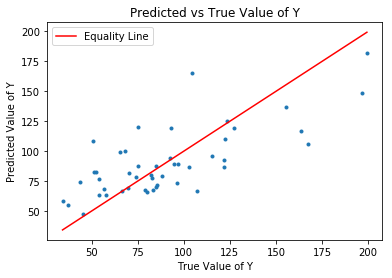

In [9]:
# plot
plt.plot(data['Y'],y_pred,'.')
plt.plot([data['Y'].min(),data['Y'].max()],[data['Y'].min(),data['Y'].max()],'r-', label="Equality Line")
plt.legend()
plt.title('Predicted vs True Value of Y')
plt.xlabel("True Value of Y")
plt.ylabel("Predicted Value of Y")

### Q5. Run cross-validation with the regressors in Q3, report the Out-of-sample R2 (OS R2)
    1. Put 50% observations on average into training set and the remaining into test set
    2. Run it 1000 times, obtain the average value

In [10]:
# define empty list
R2_OS=[]

# run loop for 1000 times to obtaion out of smaple R2
for i in range(1000):
    
    #Split data 50:50 into train and test
    np.random.seed(200 +(10*i))
    Shuffle = np.random.permutation(len(data))
    train = data.take(Shuffle)[:24]
    test = data.take(Shuffle)[24:]
    
    # Model data
    smfmodel_mv = smf.ols(formula=formula, data = train).fit()
    
    #Calculate out of sample r2
    y_pred = smfmodel_mv.predict(test)
    y_err = y_pred - test['Y']
    y_norm = test['Y']-np.mean(test['Y'])
    R2OS = 1-y_err.dot(y_err)/y_norm.dot(y_norm)
    
    # Append to empty list
    R2_OS.append(R2OS)

In [11]:
# result
print("The mean Out of Sample R2 after 1000 iterations is:", np.mean(R2_OS))

The mean Out of Sample R2 after 1000 iterations is: 0.0826516548263


### Q6. Apply regularization
Try Ridge regression for the regularization parameter $\alpha=e^{-5,-4...,9,10}$. For each value of $\alpha$ perform cross-validation with 1000 iterations of 50-50 split and report the average out-of-sample R2. Make sure to standardize the regressors first (this is essential for regularization to have regressors on the same scale).

In [22]:
def Regularization_fit_alpha(model,X_train,y_train,alphas,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS_Overall=[]
    best_R2=-1
    
    for j in alphas:
        R_2_OS=[]
        
        for i in range(1000):
            X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                        y_train, test_size = 0.5, random_state = (200+10*i))
            std_scale = StandardScaler().fit(X_train0)
            X_train_std = std_scale.transform(X_train0)
            X_valid_std  = std_scale.transform(X_valid)
            
            if model==1:
                RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
                model_label='Ridge'
            else:
                RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
                model_label='Lasso'
    
            lm = RM(j)
            lm.fit(X_train_std,y_train0)  #fit the regularization model
            y_predict=lm.predict(X_valid_std) #compute the prediction for the validation sample 
            err_OS=y_predict-y_valid
            R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
            R_2_OS.append(R_2_OS_)
        
        R_2_OS_Overall.append(np.mean(R_2_OS))
        
        if np.mean(R_2_OS) > best_R2:
            best_R2 = np.mean(R_2_OS)
            best_alpha = j
        
    return R_2_OS_Overall


In [ ]:
# Calulate R2
alphas=np.exp(np.linspace(-5,10,30))
OS_R2 = Regularization_fit_alpha(1,data[lis_predictors],data['Y'],alphas,Graph=True, logl=True)

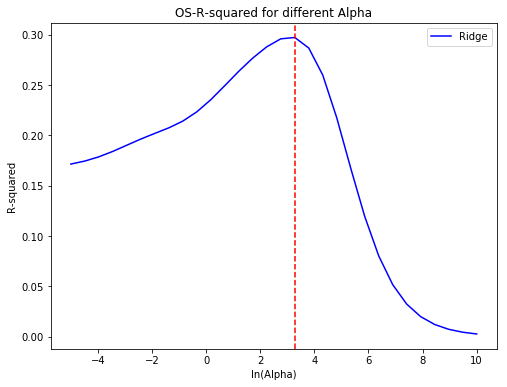

In [26]:
# Plot R2
plt.title('OS-R-squared for different Alpha')
plt.xlabel('ln(Alpha)')
l=np.log(alphas)
bl=np.log(alphas[np.argmax(OS_R2)])
plt.plot(l,OS_R2,'b',label='Ridge')
plt.legend(loc='upper right')
plt.ylabel('R-squared')
plt.axvline(bl,color='r',linestyle='--')
plt.show()
    

## Case II. Cluster the countries of the world by socio-economic profiles


This dataset contains various socio-economic statistics of the world countries like 'Population', 'Area_sqmi', 'Birthrate', 'Deathrate', 'GDP_percapita' etc. The aim of this exercise is to discover clusters of the countries of similar socio-economic profile and find the outliers

In [27]:
# Importing the countries dataset and shapefile
world = gpd.read_file('DATA/World_Countries/World_Countries.shp')
countries = pd.read_csv("DATA/countries.csv")
countries.head()

,COUNTRY,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


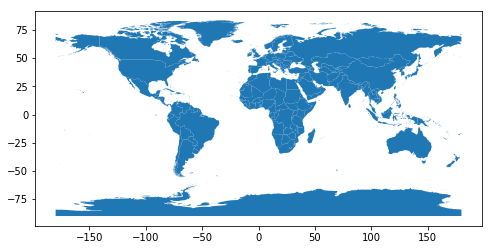

In [28]:
world.plot()

In [29]:
world.head()

,COUNTRY,geometry
0,Aruba (Netherlands),POLYGON ((-69.88223266601562 12.41110992431641...
1,Antigua and Barbuda,(POLYGON ((-61.7388916015625 17.54055404663086...
2,Afghanistan,"POLYGON ((61.27655792236328 35.60724639892578,..."
3,Algeria,POLYGON ((-5.152134895324707 30.18046951293945...
4,Azerbaijan,(POLYGON ((46.54037475585938 38.87558746337891...


### Q1. Cleaning: Clean the column 'COUNTRY' and deal with missing values
    1. Remove white-spaces from the data in column 'COUNTRY'
    2. Fill all missing values in dataset with 0
    3. Standardize the features (all columns other than County and Region; since the clusters use Euclidean distance, bringing features on the same scale is important (e.g. GDP and Climate are fully incomparable;  it is the best practice to standardise the features before using KMeans in such a case)

In [30]:
# Remove white spaces
world['COUNTRY']=world['COUNTRY'].apply(lambda x: x.replace(" ", "") )
countries['COUNTRY']=countries['COUNTRY'].apply(lambda x: x.replace(" ", "") )

In [31]:
# Step 2 Fill na's
df_countries = countries.fillna(0)

In [32]:
# Step 3: Standardize all coulmns

#list of coulmns
lis_predictors = list(df_countries.columns)

# remove country name and region
lis_predictors.remove('COUNTRY')
lis_predictors.remove('Region')

# Standardize
for i in lis_predictors:
    df_countries[i]=(df_countries[i]-np.mean(df_countries[i]))/np.std(df_countries[i])

### Q2. Clusters the countries using KMeans and Gausian Mixture model (K=2,3 clusters). 
Visualize the results:
    1. Merge the newly formed dataframe with 'world' shapefile on the attribute 'COUNTRY'
    2. Visualize on a world map using world.plot()
    3. Encode the clusters with different colors

In [33]:
# Function for plotting clusters on map
from matplotlib.colors import LinearSegmentedColormap
colors=['green','blue','red','yellow','magenta']

def plot_on_map(gdf,column,labels1): # gdf: shapefile, column: which can be used as ID to map with labels, labels: ID and label
    #visualize zip codes using clusters for picking colors        
    f, ax = plt.subplots(1, figsize=(12, 12))     
    for c in range(np.max(labels1)+1): #for each cluster
        gdf.loc[gdf[column]==c].plot(axes=ax, color=colors[c]) #visualize zip codes which belong to it using cluster color

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


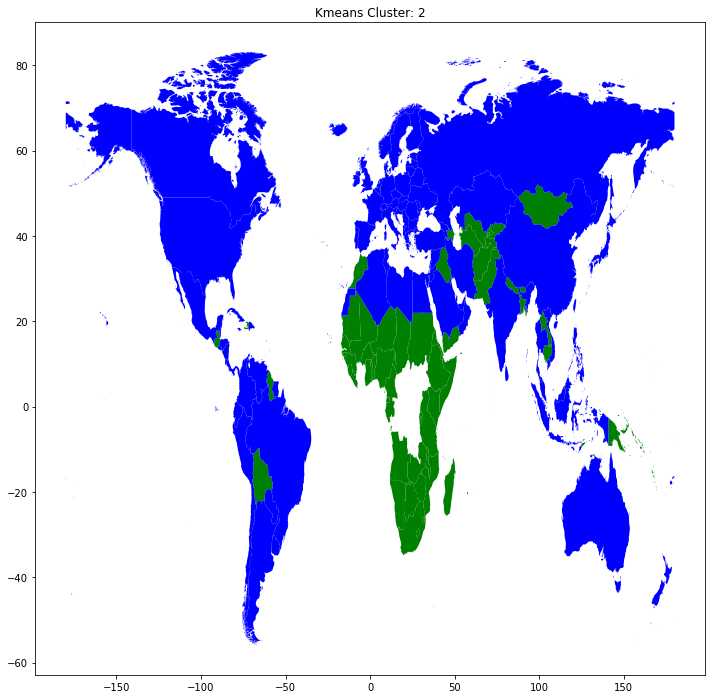

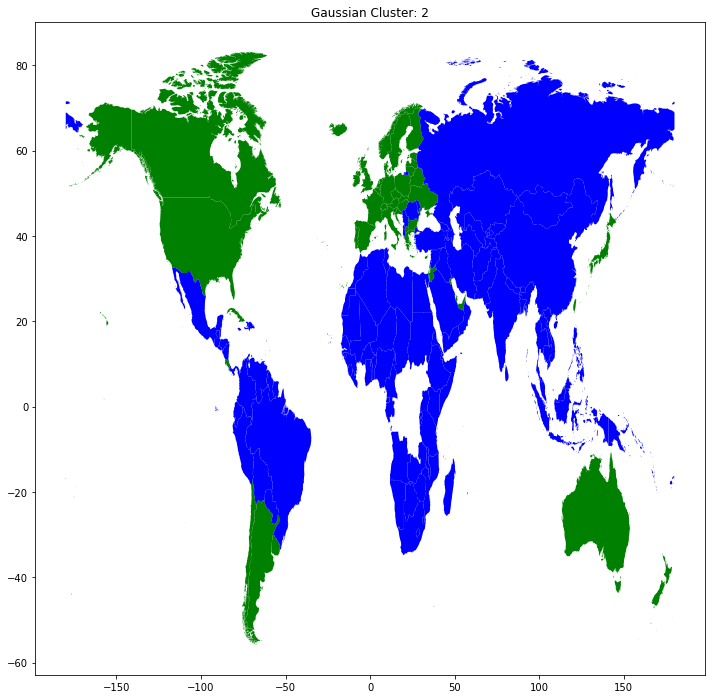

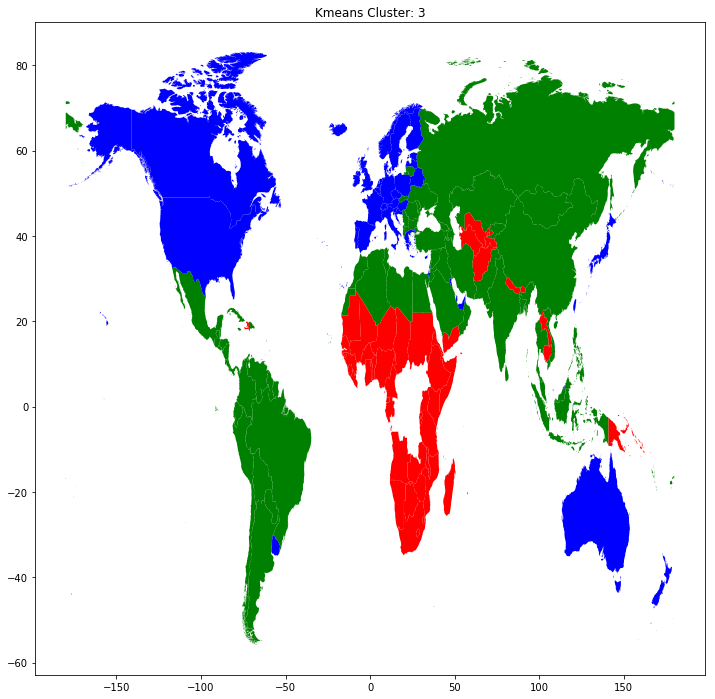

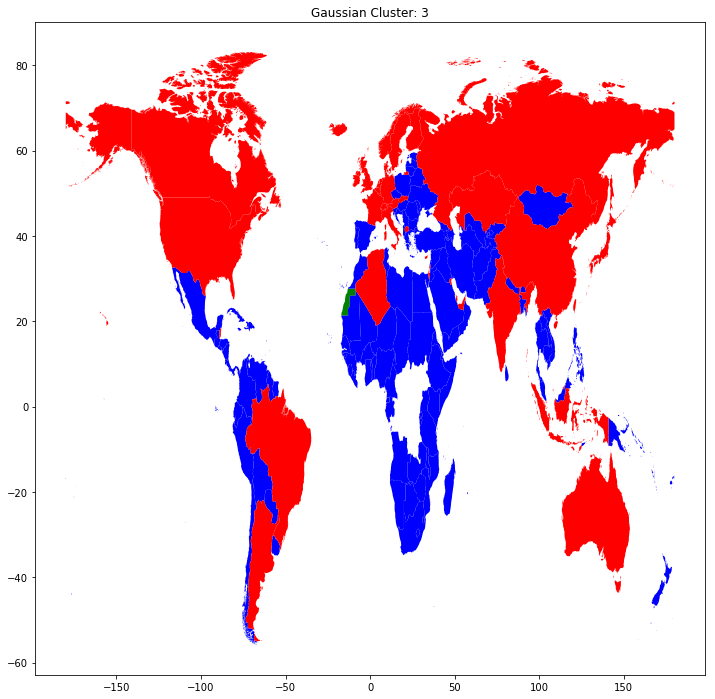

In [34]:
# Perform k means and gaussian clustering
for k in range(2,4):
    from sklearn.cluster import KMeans
    km=KMeans(random_state=1,n_clusters=k)  
    res=km.fit(df_countries[lis_predictors])
    labels = pd.DataFrame({'COUNTRY':df_countries.COUNTRY, 'Labels':res.labels_})
    world1 = world.merge(labels, left_on='COUNTRY', right_on='COUNTRY', how='inner')
    plot_on_map(world1, 'Labels', labels['Labels'])
    plt.title(("Kmeans Cluster: " +str(k)))
    
    from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
    gm=GaussianMixture(n_components=k,random_state=324)
    res1=gm.fit(df_countries[lis_predictors])
    labels = pd.DataFrame({'COUNTRY':df_countries.COUNTRY, 'Labels':res1.predict(df_countries[lis_predictors])})
    world1 = world.merge(labels, left_on='COUNTRY', right_on='COUNTRY', how='inner')
    plot_on_map(world1, 'Labels', labels['Labels'])
    plt.title(("Gaussian Cluster: " +str(k)))

### Q3. Use average silhuette to find the best number of clusters for K-means and Gausian Mixture (try K=2,3...,10).

In [35]:
# Silhoutte for kmean
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

def silhouetteScore(X,K):
    silhouette=[]
    range_n_clusters = K
    for n_clusters in range_n_clusters: #try different numbers of clusters
        km = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = km.fit_predict(X)
        #report average Silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette.append(silhouette_avg)
        print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))
    plt.plot(range_n_clusters,silhouette,'-')
    return silhouette

For n_clusters =2, the average silhouette_score is :0.18404937569198165
For n_clusters =3, the average silhouette_score is :0.1527770950649972
For n_clusters =4, the average silhouette_score is :0.1638839171721478
For n_clusters =5, the average silhouette_score is :0.15006201372808245
For n_clusters =6, the average silhouette_score is :0.15713732346705167
For n_clusters =7, the average silhouette_score is :0.15770248655841265
For n_clusters =8, the average silhouette_score is :0.15905374940113082
For n_clusters =9, the average silhouette_score is :0.1408732276605481


[0.18404937569198165,
 0.1527770950649972,
 0.16388391717214781,
 0.15006201372808245,
 0.15713732346705167,
 0.15770248655841265,
 0.15905374940113082,
 0.14087322766054811]

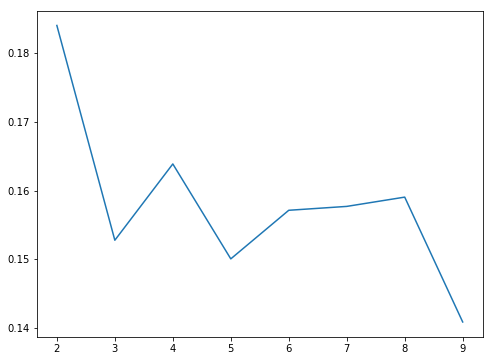

In [36]:
silhouetteScore(df_countries[lis_predictors],range(2,10))

Best number of cluster for k means as per silhoutte average is: 2

In [37]:
# Silhouette for gaussian misxture model
def silhouetteScore(X,K):
    silhouette=[]
    range_n_clusters = K
    for n_clusters in range_n_clusters: #try different numbers of clusters
        gm=GaussianMixture(n_components=n_clusters,random_state=324)
        res1=gm.fit(X)
        cluster_labels = res1.predict(df_countries[lis_predictors])
        #report average Silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette.append(silhouette_avg)
        print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))
    plt.plot(range_n_clusters,silhouette,'-')
    return silhouette

For n_clusters =2, the average silhouette_score is :0.16376517418436484
For n_clusters =3, the average silhouette_score is :0.14895954117909485
For n_clusters =4, the average silhouette_score is :0.1256929754614338
For n_clusters =5, the average silhouette_score is :0.1603722434774493
For n_clusters =6, the average silhouette_score is :0.1195663596599303
For n_clusters =7, the average silhouette_score is :0.11938667625065434
For n_clusters =8, the average silhouette_score is :0.11383465216600007
For n_clusters =9, the average silhouette_score is :0.11469963395968871


[0.16376517418436484,
 0.14895954117909485,
 0.12569297546143379,
 0.1603722434774493,
 0.1195663596599303,
 0.11938667625065434,
 0.11383465216600007,
 0.11469963395968871]

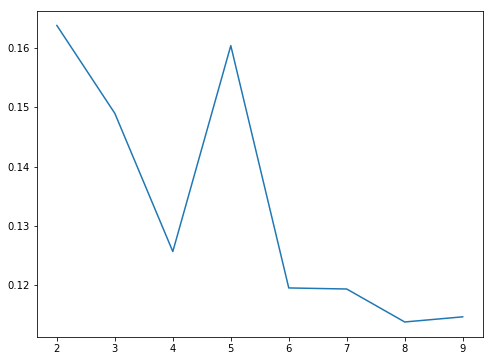

In [38]:
silhouetteScore(df_countries[lis_predictors],range(2,10))

Optimum number of clusters for gaussian mixture model is again 2 and second best is 5 as per silhouette

### Q.4  Transform all features using PCA into 2 principal components and visualize on a scatter plot
Annotate the data points which appear as outliers

In [39]:
# Perform PCA
pca = PCA(2) #take only N leading principal components to get enough data but avoid overfitting
P_train=pca.fit_transform(df_countries[lis_predictors])

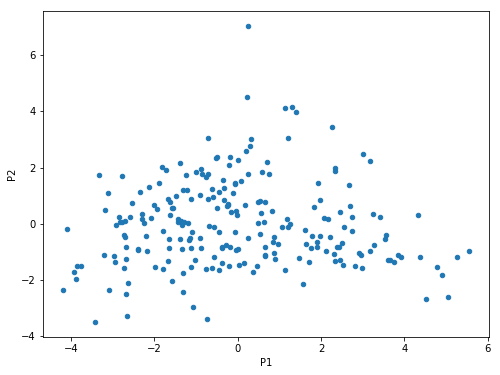

In [40]:
# Plot the data on the 2 major principal components
df_plot=pd.DataFrame()
df_plot['P1']=P_train[:,0]
df_plot['P2']=P_train[:,1]
df_plot.plot(x='P1', y='P2', kind='Scatter')

In [41]:
# Mark Outlier
df_plot['outlier']=df_plot.apply(lambda x: (x['P1']<-3)|(x['P1']>3)|(x['P2']<-3)|(x['P2']>3), axis=1)

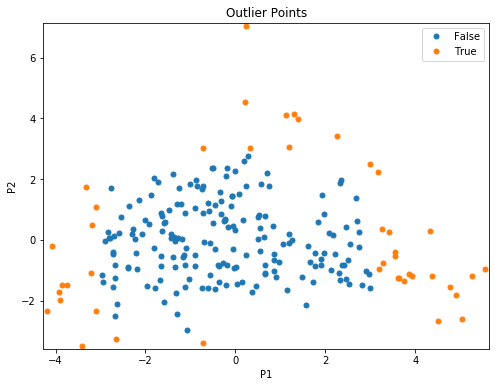

In [43]:
# Plot first 2 principal component 
groups =df_plot.groupby('outlier')
fig, ax = plt.subplots()
ax.margins(0.01) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.P1, group.P2, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.xlabel('P1')
plt.ylabel('P2')
plt.title("Outlier Points")
plt.show()


#  Part III. Reconstructing faces using PCA

This dataset is made up of images containing faces of celebrities and world leaders. Since an image is a 2-D array (eg - 62 x 47 pixels) where each pixel is a feature, there will be large number of features (eg - 2914 features) making it difficult for the model to train quickly and predict accurately. In such cases, PCA comes to the rescue where the Principal components can capture large amount of information without using too many features. This can come in handy while building models for CCTV surveillance, pedestrian counting, public safety etc. 
<br><br>
Total images : 1288<br>
Image size : 62 x 47<br>
Total features : 2914<br><br>
To make it easy to use, the image has been flattened to a 1-D array containing all the features (or pixels). All computations can be done on the flattened image but only for displaying the image, it has to be reshaped to the original dimensions (height, width)

## Loading and viewing dataset

Total images: 1288
Total features: 2914

Height: 62 
Width: 47


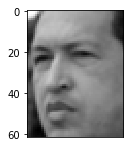

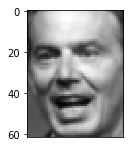

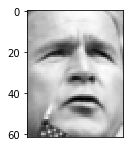

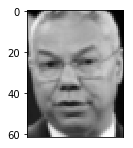

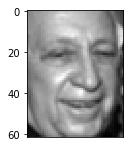

In [3]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70)
n_samples, height, width = lfw_people.images.shape
npix = height*width
fea = lfw_people.data

print ("Total images:", len(fea))
print ("Total features:", npix)
print ("\nHeight:", height, "\nWidth:", width)

def plt_face(x):
    #print "Inside plt_face()"
    #global h,w
    plt.imshow(x.reshape((height, width)), cmap=plt.cm.gray)
    plt.xticks([])
    
n = 5
for i in range(n):
    plt.figure(figsize=(10, 20))
    plt.subplot(1,n,i+1)
    plt_face(fea[i])
    plt.show()

## Helper Functions

*** 1/3 Computes the Mean of all images, returns it as 'M' ***

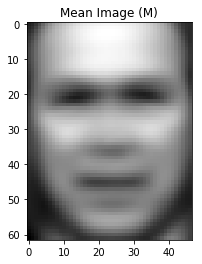

In [4]:
def mean_image(fea):
    """Computes mean for each pixel in the image frame
    
    Parameters:
        fea : Feature vector containing of all images
    
    Returns:
        new_img : Mean Image
    """
    rows, cols = fea.shape
    new_img = np.zeros(cols)
    for i in range(cols):
        mean = fea[:,i].mean()
        new_img[i] = mean
        
    return new_img

M = mean_image(fea)

plt.title ("Mean Image (M)")
plt.imshow(M.reshape(height, width), cmap = 'gray')

*** 2/3 Displays the image from Principal components ***

Reconstructing original image using equation : $ \bf{X = W^T \cdot Z + M} $

In [5]:
def display_image_from_pca(Z, pca, fea, image_no=4):
    """Display an image from the Transformed data, PCA model and features along with the original image
    
    Parameters:
        Z : Transormed data after using PCA
        pca : PCA model used to transform the data
        fea : All images
        image_no : Image no. to be displayed
    
    Returns:
        Displays the reconstructed image and original image
        
    The columns of W are the eigenvectors of the covariance matrix of X
    The columns of Z correspond to attributes associated with largest eigen value
    """
    # Fetching eigenvectors and the transformed data
    W = pca.components_     
    # Applying reconstruction equation on the values obtained
    X = ( W.transpose().dot(Z[image_no]) + mean_image(fea) ).reshape( (height,width) )
    
    # Displaying the images
    plt.subplot(1, 2, 1)
    plt.title("Reconstructed Image")
    plt.imshow(X, cmap = 'gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Original Image")
    plt.imshow(fea[image_no].reshape(height, width), cmap = 'gray')
    plt.show()

*** 3/3 Makes dataframe containing images, names and target_no for simplicity of use afterwards ***

In [6]:
target_names = lfw_people.target_names
#true_names = []
ls = []
for i in range(len(fea)):
    target_no = lfw_people.target[i]
    true_name = target_names[target_no].rsplit(' ', 1)[-1]
    ls.append([fea[i], true_name, target_no])
    
df = pd.DataFrame(ls, columns=['Image', 'True_Name', 'Target_Number'])
df.head()

,Image,True_Name,Target_Number
0,"[253.667, 254.333, 253.667, 250.667, 242.333, ...",Chavez,5
1,"[38.3333, 43.0, 53.0, 41.0, 51.0, 89.0, 113.66...",Blair,6
2,"[88.0, 92.6667, 112.667, 129.0, 141.333, 150.6...",Bush,3
3,"[13.3333, 7.33333, 6.33333, 7.66667, 5.0, 10.6...",Powell,1
4,"[123.667, 121.0, 123.0, 129.0, 130.333, 129.66...",Sharon,0


### Q1. Fit a PCA model and return the transformed data
    Hint: Use numpy array - 'fea' (contains feature vector of all the images) for fitting PCA model

In [14]:
# PCA and transformed data
pca = PCA(1288) #take only N leading principal components to get enough data but avoid overfitting
P_fea=pca.fit_transform(fea)

### Q2. Visualize all the images in the space of the first two Principal components
    Make a scatter plot, where images are represented as dots

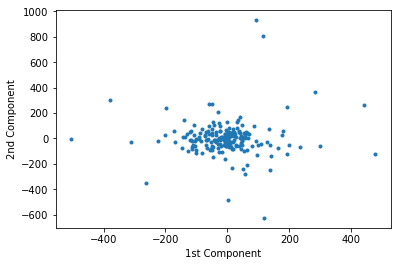

In [31]:
plt.plot(P_fea[0], P_fea[1], '.')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')


### Q3. Visualize Bush vs Powell in the space of 1st and 6th components

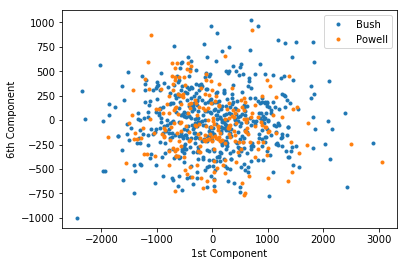

In [27]:
plt.plot(P_fea[df.index[(df['True_Name']=='Bush')],1], P_fea[df.index[(df['True_Name']=='Bush')],6],'.',label="Bush")
plt.plot(P_fea[df.index[(df['True_Name']=='Powell')],1], P_fea[df.index[(df['True_Name']=='Powell')],6],'.',label='Powell')

plt.xlabel('1st Component')
plt.ylabel('6th Component')
plt.legend()
plt.show()

### Q4.  Reconstructing original image

Display any reconstructed image by passing the PCA model, transformed data, images and a particular image_no to 'display_image_from_pca' function which will display the reconstructed and original image side-by-side in the same plot. Use first 6, 50 and 200 components

### 6 components

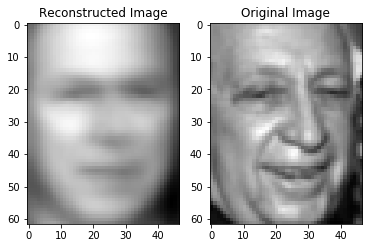

In [28]:
# PCA and transformed data
pca = PCA(6) #take only N leading principal components to get enough data but avoid overfitting
P_fea=pca.fit_transform(fea)
display_image_from_pca(P_fea, pca, fea, image_no=4)

### 50 components

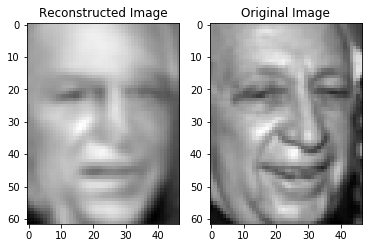

In [29]:
# PCA and transformed data
pca = PCA(50) #take only N leading principal components to get enough data but avoid overfitting
P_fea=pca.fit_transform(fea)
display_image_from_pca(P_fea, pca, fea, image_no=4)

### 200 components

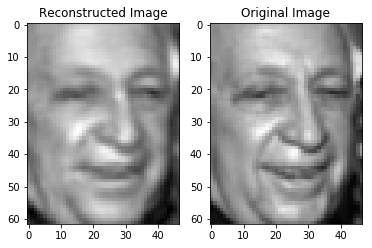

In [30]:
# PCA and transformed data
pca = PCA(200) #take only N leading principal components to get enough data but avoid overfitting
P_fea=pca.fit_transform(fea)
display_image_from_pca(P_fea, pca, fea, image_no=4)